In [1]:
# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px



# for preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV


# for model training
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# import model for regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

# import tensorflow for creating neural networks
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# import CatBoostClassifier
from catboost import CatBoostClassifier


# for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


2024-07-20 16:26:15.599729: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-20 16:26:15.677531: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-20 16:26:16.146463: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-20 16:26:16.149912: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-20 16:26:19.515722: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

## Get Data

In [2]:
data = pd.read_csv('raw_data/train.csv')

In [3]:
data = data.set_index('id')

In [4]:
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0


In [5]:
X = data.drop('Exited', axis=1)
y = data[['Exited']]

## Preproc

### Duplicates

In [6]:
len(data) # Check number of rows before removing duplicates

165034

In [7]:
X.duplicated().sum()

0

In [8]:
data = data.drop_duplicates() # Remove duplicates
len(data)# Check new number of rows

165034

### Missing Values

In [9]:
# Counting the number of NaN for each column
data.isnull().sum().sort_values(ascending=False)

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Outliers

In [10]:
data.head(1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0


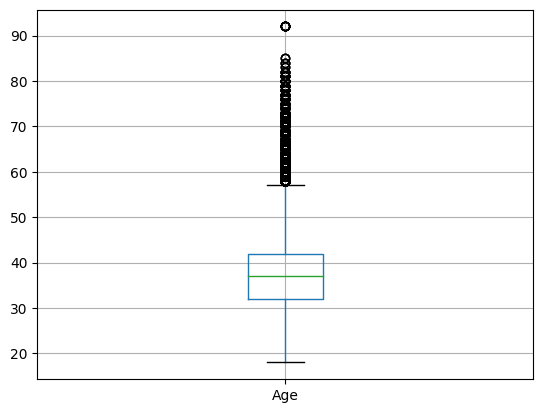

In [11]:
data[['Age']].boxplot();

In [12]:
data['Age'].max()

92.0

In [13]:
data[['CreditScore']].boxplot();

In [14]:
data['CreditScore'].min()

350

In [15]:
## Keep outliers as they make sense

### PipeLine

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import TruncatedSVD

# Define the columns
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
categorical_ordinal_features = ['Gender']
categorical_onehot_features = ['Geography']
drop_features = ['CustomerId', 'Surname']

# Preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_ordinal_pipeline = Pipeline([
    ('ordinal_encoder', OrdinalEncoder(categories=[['Male', 'Female']]))
])

categorical_onehot_pipeline = Pipeline([
    ('onehot_encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat_ord', categorical_ordinal_pipeline, categorical_ordinal_features),
        ('cat_onehot', categorical_onehot_pipeline, categorical_onehot_features)
    ]
)


In [17]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'HasCrCard',
                                  'IsActiveMember', 'EstimatedSalary']),
                                ('cat_ord',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['Male',
                                                                              'Female']]))]),
                                 ['Gender']),
                                ('cat_onehot',
                                 Pipeline(steps=[('onehot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Geography'])])

In [18]:
X_transformed = pd.DataFrame(preprocessor.fit_transform(X))

### Blance + Reduce Rimensionality

In [19]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_transformed, y)

In [64]:
svd = TruncatedSVD(n_components=8)
svd.fit(X_resampled)
final_df = svd.transform(X_resampled)

final_df = pd.DataFrame(final_df, columns=[f'component_{i+1}' for i in range(final_df.shape[1])])
final_df = final_df.set_index(X_resampled.index)
final_df

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
0,-0.836397,1.223991,-0.630148,0.209534,-1.543723,0.118094,-0.925319,-0.318476
1,-1.377114,0.360669,0.038168,1.732242,0.682851,0.887087,0.485185,-0.323102
2,-0.563407,1.581417,-0.904199,-1.784414,-0.740952,-1.098880,-0.276316,-0.156072
3,0.988072,-1.167631,-0.388409,1.008517,0.155622,1.297855,0.755162,-0.049002
4,-1.538367,-0.133438,-0.116739,1.095812,1.702333,-0.570199,0.354994,-0.297806
...,...,...,...,...,...,...,...,...
260221,1.833957,-0.288265,-0.347034,1.499485,0.534043,-1.308691,-0.958656,0.147158
260222,1.507083,-0.025239,2.314052,0.625923,0.129674,0.481502,0.774526,-0.453200
260223,1.604313,-0.265598,-0.830207,0.215542,1.734481,-0.439721,-0.598708,0.403440
260224,0.323419,0.204965,0.999651,-1.552776,0.416673,-1.241015,-1.816012,-1.865356


## CV

In [ ]:
# from sklearn.model_selection import cross_validate

# # Instantiate model
# model = CatBoostClassifier()

# # 5-Fold Cross validate model
# cv_results = cross_validate(model, final_df, y_resampled, cv=5)

# # Mean of scores
# cv_results['test_score'].mean()

In [24]:
# cv_results['test_score'].mean()

## Fine Tune

In [25]:
from scipy.stats import randint as sp_randInt
from scipy.stats import uniform as sp_randFloat
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier

# Define a more conservative parameter grid
param_dist = {
    'depth': sp_randInt(4, 8),  # Narrow the depth range
    'learning_rate': sp_randFloat(0.01, 0.1),  # Narrow the learning rate range
    'iterations': sp_randInt(10, 200),  # Lower the maximum number of iterations
    'l2_leaf_reg': sp_randFloat(1, 5),  # Reduce the range for L2 regularization
    'border_count': sp_randInt(32, 128)  # Lower the range for border count
}

# Initialize the CatBoostClassifier
model = CatBoostClassifier(task_type='CPU', silent=True)

# Instantiate RandomizedSearchCV with fewer iterations
search = RandomizedSearchCV(
    model,
    param_dist,
    scoring='roc_auc',
    n_iter=50,  # Reduce number of draws
    cv=5,
    n_jobs=-1,
    verbose=1  # Optional, for more detailed output
)

# Fit the model
search.fit(X, y)


0:	learn: 0.6654025	total: 266ms	remaining: 5.59s
0:	learn: 0.6646484	total: 466ms	remaining: 9.79s
0:	learn: 0.5198483	total: 555ms	remaining: 16.6s
1:	learn: 0.6410790	total: 695ms	remaining: 6.95s
1:	learn: 0.4738902	total: 921ms	remaining: 13.4s
1:	learn: 0.6403624	total: 1s	remaining: 10s
0:	learn: 0.5763783	total: 679ms	remaining: 56.4s
2:	learn: 0.6208611	total: 1.39s	remaining: 8.78s
2:	learn: 0.4553026	total: 1.32s	remaining: 12.3s
2:	learn: 0.6192002	total: 1.73s	remaining: 11s
3:	learn: 0.4474094	total: 1.83s	remaining: 12.3s
0:	learn: 0.5387116	total: 729ms	remaining: 48.1s
1:	learn: 0.5190030	total: 1.44s	remaining: 59.1s
0:	learn: 0.5451854	total: 467ms	remaining: 30.8s
3:	learn: 0.6021679	total: 2.09s	remaining: 9.42s
0:	learn: 0.5979115	total: 767ms	remaining: 20.7s
3:	learn: 0.6009745	total: 2.18s	remaining: 9.82s
1:	learn: 0.4909495	total: 957ms	remaining: 31.1s
2:	learn: 0.4716068	total: 1.24s	remaining: 26.5s
2:	learn: 0.4850376	total: 1.97s	remaining: 53.1s
1:	lear

In [27]:
randm.best_score_

0.808370416484133

In [28]:
# Save the best model to a file
randm.best_estimator_.save_model('catboost_model.cbm')

In [29]:
model = randm.best_estimator_.fit(final_df, y_resampled)

0:	learn: 0.5746266	total: 73.7ms	remaining: 6.12s
1:	learn: 0.5160862	total: 150ms	remaining: 6.13s
2:	learn: 0.4840015	total: 213ms	remaining: 5.75s
3:	learn: 0.4651182	total: 305ms	remaining: 6.11s
4:	learn: 0.4530799	total: 426ms	remaining: 6.73s
5:	learn: 0.4455559	total: 539ms	remaining: 7s
6:	learn: 0.4406303	total: 603ms	remaining: 6.63s
7:	learn: 0.4373895	total: 667ms	remaining: 6.33s
8:	learn: 0.4351732	total: 732ms	remaining: 6.1s
9:	learn: 0.4330910	total: 862ms	remaining: 6.38s
10:	learn: 0.4316061	total: 933ms	remaining: 6.19s
11:	learn: 0.4306894	total: 979ms	remaining: 5.87s
12:	learn: 0.4298264	total: 1.06s	remaining: 5.79s
13:	learn: 0.4290147	total: 1.12s	remaining: 5.62s
14:	learn: 0.4278944	total: 1.19s	remaining: 5.5s
15:	learn: 0.4271094	total: 1.26s	remaining: 5.38s
16:	learn: 0.4264490	total: 1.34s	remaining: 5.28s
17:	learn: 0.4258579	total: 1.41s	remaining: 5.16s
18:	learn: 0.4249947	total: 1.49s	remaining: 5.11s
19:	learn: 0.4244194	total: 1.59s	remaining: 

In [58]:
model

## Predict

In [31]:
test = pd.read_csv('raw_data/test.csv')
test = test.set_index('id')

In [35]:
test.shape

(110023, 12)

In [65]:
test_transformed = pd.DataFrame(preprocessor.transform(test))

final_test = svd.transform(test_transformed)

final_test = pd.DataFrame(final_test, columns=[f'component_{i+1}' for i in range(final_test.shape[1])])
final_test = final_test.set_index(test.index)
final_test

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
id,,,,,,,,
165034,-1.570255,-0.078351,1.656092,-0.243894,-1.214853,1.625671,-0.350120,-0.742124
165035,1.152554,1.580218,-0.257038,1.330710,0.589757,0.123077,-0.560607,-1.127777
165036,-0.665364,1.452606,-0.832846,-0.743596,-0.266959,-0.269655,-0.759542,-0.219284
165037,0.380178,0.726252,-1.058206,-0.833721,0.443026,-0.393386,-0.642518,-1.351833
165038,1.479784,-0.608254,-1.146128,-1.274474,-0.032678,-1.699841,-0.701364,0.040711
...,...,...,...,...,...,...,...,...
275052,0.436438,-1.387399,-0.942341,-0.976991,-0.448345,0.840295,0.941016,-0.303420
275053,1.449152,-1.104955,-0.426435,0.686818,1.164297,1.046589,0.837208,0.314171
275054,-1.081981,0.790415,-0.470880,1.709843,1.351241,0.037458,-1.486479,-0.239961


In [66]:
pred = model.predict(final_test)
pred[0]

0

In [67]:
pred_proba = model.predict_proba(final_test)
pred_proba[0]

array([0.93324903, 0.06675097])

In [68]:
results = pd.DataFrame(pred_proba)[[1]]

In [69]:
results = results.set_index(test.index)
results = results.rename(columns={1:'Exited'})

In [70]:
results.to_csv('predictions.csv',index=True)